<a href="https://colab.research.google.com/github/kaispace30098/FB_Prophet_modeling_on_Sales/blob/main/Facebook_Prophet_on_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 49 kB 1.9 MB/s 
     |████████████████████████████████| 45 kB 718 kB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639816 sha256=82f074cc1cefeef2c6d1613b57f53e2c19c9bf423eb93e47b6e30fd522cd301b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
from prophet import Prophet

In [3]:
# Use Kaggle Rossman Sales data as an example
# https://www.kaggle.com/c/rossmann-store-sales
!wget https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

--2022-04-10 04:45:57--  https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38057952 (36M) [text/csv]
Saving to: ‘rossmann_train.csv’

rossmann_train.csv  100%[===================>]  36.29M  35.4MB/s    in 1.0s    

2022-04-10 04:45:58 (35.4 MB/s) - ‘rossmann_train.csv’ saved [38057952/38057952]



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
df = pd.read_csv('rossmann_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df2=df[df.Store==2]

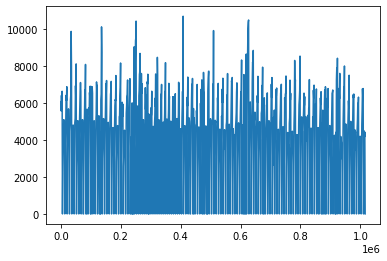

In [7]:
df2.Sales.plot()

In [8]:
df2=df2.drop(['Store', 'DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday'], axis=1)
df2 = df2.rename(columns={'Date': 'ds', 'Sales': 'y'})

In [9]:
df2 = df2.rename(columns={'Date': 'ds', 'Sales': 'y'})

In [10]:
df2.head()

,ds,y
1,2015-07-31,6064
1116,2015-07-30,5567
2231,2015-07-29,6402
3346,2015-07-28,5671
4461,2015-07-27,6627


In [11]:
m=Prophet()

In [12]:
m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future=m.make_future_dataframe(periods=365,freq='D')

In [14]:
forecast=m.predict(future)

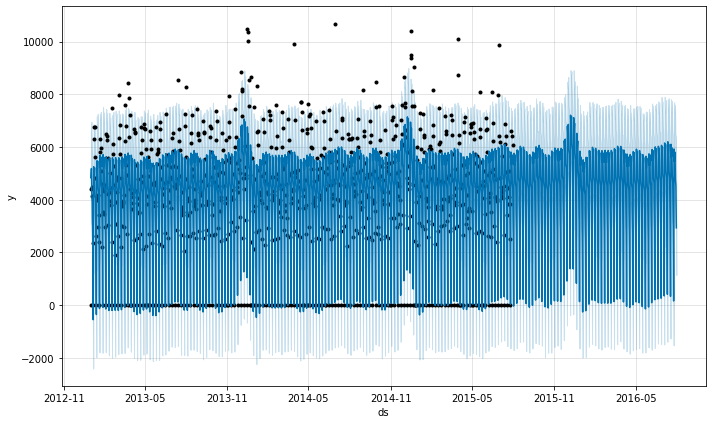

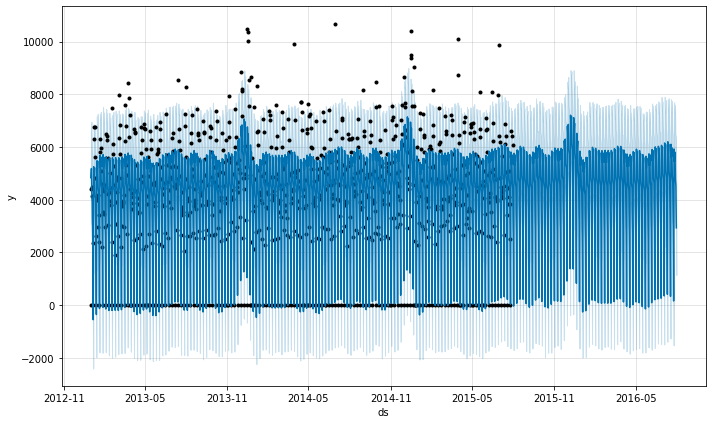

In [15]:
m.plot(forecast)

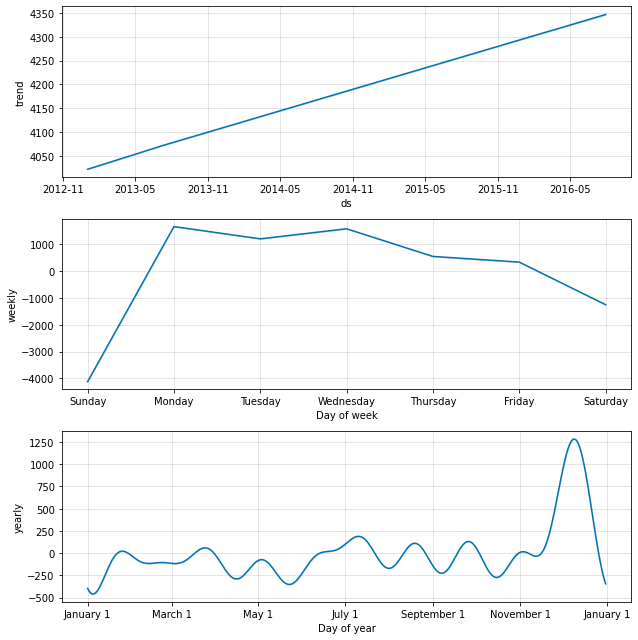

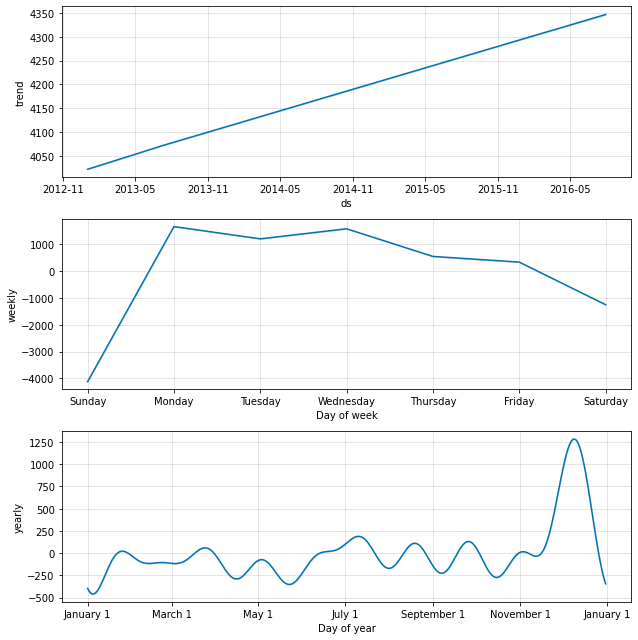

In [16]:
m.plot_components(forecast)

In [17]:
#Cross_validation
from prophet.diagnostics import cross_validation

In [36]:
df_cv = cross_validation(
    m,
    initial='730 days',#prophet defualt
    period='25 days',
    horizon='50 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-12 00:00:00 and 2015-06-11 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-13,5132.625869,3414.476869,6783.886336,6444,2015-01-12
1,2015-01-14,5583.885583,3825.301308,7453.210112,6366,2015-01-12
2,2015-01-15,4627.587731,2920.294103,6429.531336,5810,2015-01-12
3,2015-01-16,4538.718020,2911.244205,6420.181744,5456,2015-01-12
4,2015-01-17,2892.560817,1111.187717,4674.570762,2883,2015-01-12
...,...,...,...,...,...,...
345,2015-07-27,5838.243903,3966.053595,7539.134122,6627,2015-06-11
346,2015-07-28,5340.227859,3499.883302,7043.040733,5671,2015-06-11
347,2015-07-29,5695.597657,4072.376621,7448.296592,6402,2015-06-11
348,2015-07-30,4641.361695,2865.084241,6314.320925,5567,2015-06-11


In [38]:
from prophet.diagnostics import performance_metrics

In [39]:
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,5 days,1.923522e+06,1386.910812,1008.109054,0.203503,0.465968,0.857143
1,6 days,2.439861e+06,1562.005512,1096.712372,0.199513,0.513779,0.828571
2,7 days,2.391918e+06,1546.582808,1110.172151,0.214982,0.523345,0.800000
3,8 days,2.587427e+06,1608.547982,1119.645089,0.235869,0.560790,0.800000
4,9 days,3.950852e+06,1987.674967,1307.686445,0.275601,0.657079,0.771429
5,10 days,3.982095e+06,1995.518660,1335.692378,0.285206,0.667126,0.771429
6,11 days,3.316084e+06,1821.011833,1170.735368,0.285206,0.606828,0.828571
7,12 days,3.138359e+06,1771.541453,1079.610927,0.203346,0.587951,0.885714
8,13 days,2.202535e+06,1484.094131,945.082895,0.195483,0.535227,0.942857
9,14 days,6.772013e+05,822.922402,667.448651,0.174431,0.422594,1.000000


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


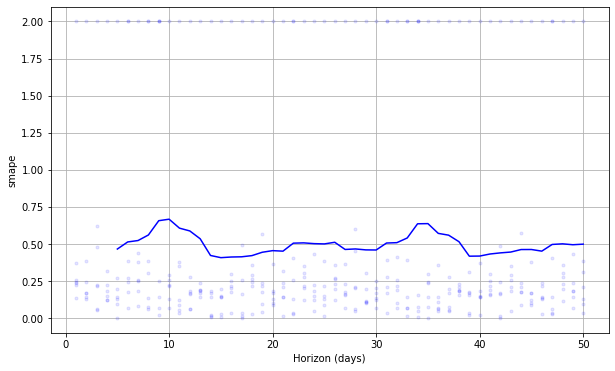

In [40]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [23]:
from prophet.plot import add_changepoints_to_plot


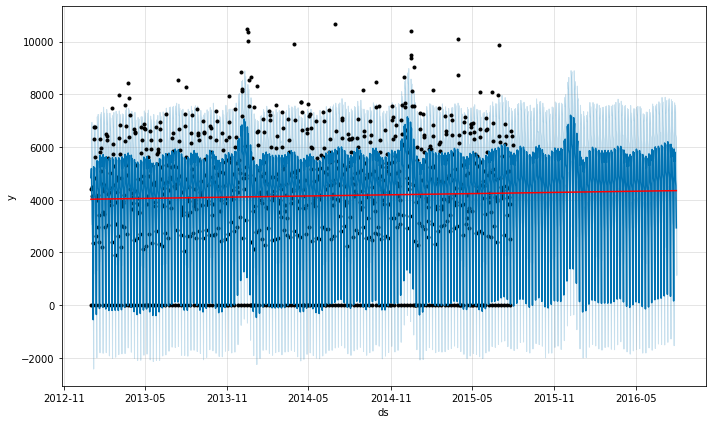

In [24]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


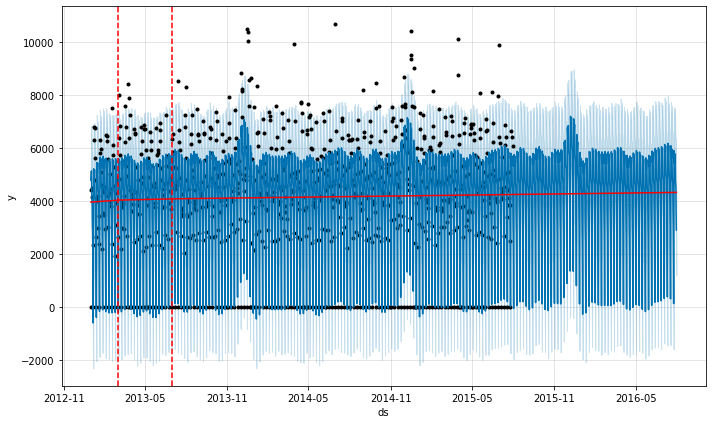

In [29]:
#Let's try to finetune the model by increase the flexibility by adjusting the change point prior scale
m_cp=Prophet(changepoint_prior_scale=0.5)
forecast_cp=m_cp.fit(df2).predict(future)
fig=m_cp.plot(forecast_cp)
a=add_changepoints_to_plot(fig.gca(),m_cp,forecast_cp)

In [32]:
df_cv_cp = cross_validation(
    m_cp,
    initial='730 days',#prophet defualt
    period='25 days',
    horizon='50 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-12 00:00:00 and 2015-06-11 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [35]:
performance_metrics(df_cv_cp)


INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,5 days,1.946575e+06,1395.196977,1017.316728,0.199697,0.467483,0.857143
1,6 days,2.471571e+06,1572.123210,1111.312288,0.199199,0.516113,0.828571
2,7 days,2.435390e+06,1560.573488,1130.421743,0.228669,0.527186,0.800000
3,8 days,2.624075e+06,1619.899698,1142.984368,0.237240,0.565364,0.800000
4,9 days,3.971483e+06,1992.858046,1329.912866,0.291104,0.661653,0.771429
5,10 days,3.991639e+06,1997.908718,1350.861138,0.293471,0.670724,0.771429
6,11 days,3.313628e+06,1820.337212,1178.888134,0.293471,0.609008,0.800000
7,12 days,3.123370e+06,1767.305995,1081.371137,0.202719,0.589059,0.857143
8,13 days,2.180725e+06,1476.727792,940.828632,0.185616,0.534767,0.914286
9,14 days,6.653489e+05,815.689210,661.994021,0.173504,0.421720,0.971429


INFO:prophet:Skipping MAPE because y close to 0
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


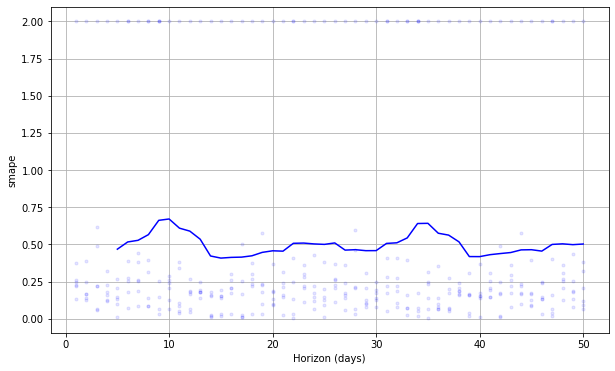

In [34]:
performance_metrics(df_cv_cp)
plot_cross_validation_metric(df_cv, metric='smape');

In [51]:
import statistics as stats
print(stats.mean(performance_metrics(df_cv)['smape']))
stats.mean(performance_metrics(df_cv_cp)['smape'])

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Skipping MAPE because y close to 0


0.4983554372875019


0.49945839710844725

In [61]:
df2_open=df[(df.Store==2)&(df.Open>0)]
df2_open=df2_open.drop(['Store', 'DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday'], axis=1)
df2_open = df2_open.rename(columns={'Date': 'ds', 'Sales': 'y'})
df2_open.head()

,ds,y
1,2015-07-31,6064
1116,2015-07-30,5567
2231,2015-07-29,6402
3346,2015-07-28,5671
4461,2015-07-27,6627


In [66]:
m_open=Prophet()
m_open.fit(df2_open)
future_open=m_open.make_future_dataframe(periods=365)
forecast_open=m_open.predict(future_open)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


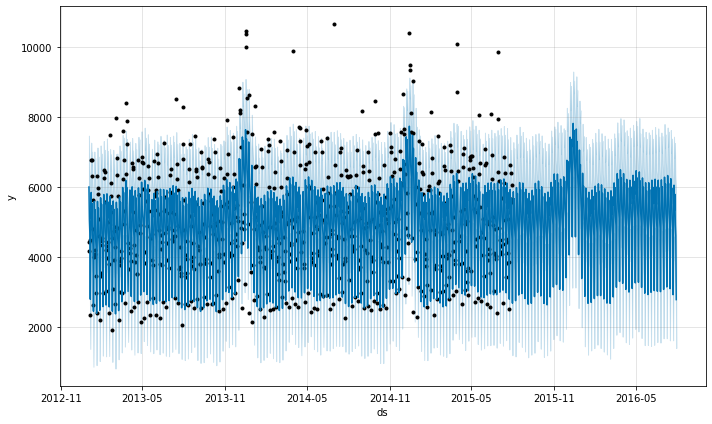

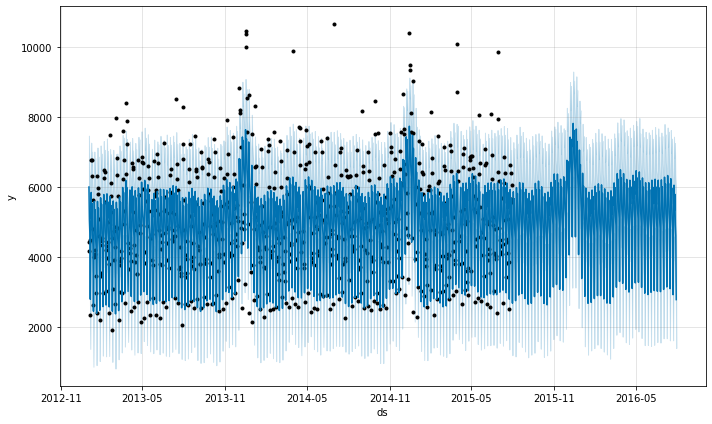

In [68]:
m_open.plot(forecast_open)

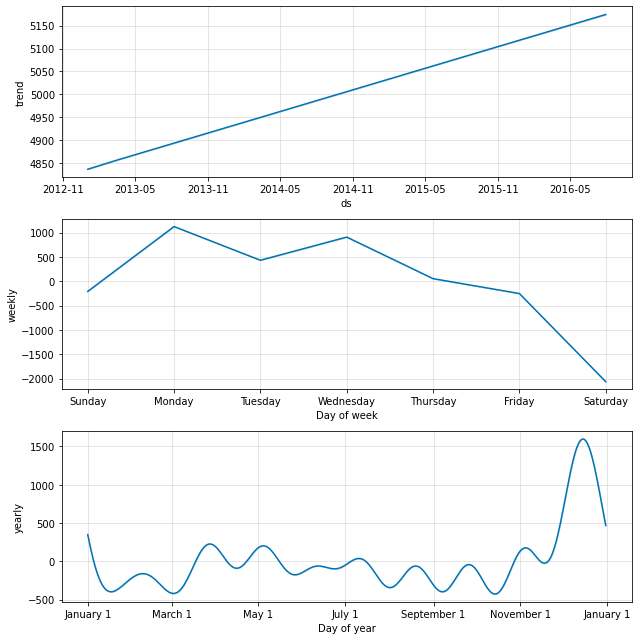

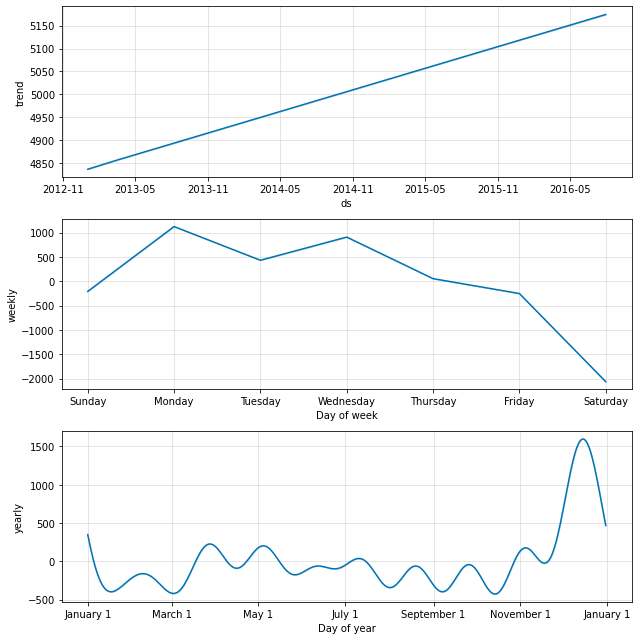

In [70]:
m_open.plot_components(forecast_open)

In [71]:
df_cv_open = cross_validation(
    m_open,
    initial='730 days',#prophet defualt
    period='25 days',
    horizon='50 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-12 00:00:00 and 2015-06-11 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [72]:
performance_metrics(df_cv_cp)

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,5 days,1.946575e+06,1395.196977,1017.316728,0.199697,0.467483,0.857143
1,6 days,2.471571e+06,1572.123210,1111.312288,0.199199,0.516113,0.828571
2,7 days,2.435390e+06,1560.573488,1130.421743,0.228669,0.527186,0.800000
3,8 days,2.624075e+06,1619.899698,1142.984368,0.237240,0.565364,0.800000
4,9 days,3.971483e+06,1992.858046,1329.912866,0.291104,0.661653,0.771429
5,10 days,3.991639e+06,1997.908718,1350.861138,0.293471,0.670724,0.771429
6,11 days,3.313628e+06,1820.337212,1178.888134,0.293471,0.609008,0.800000
7,12 days,3.123370e+06,1767.305995,1081.371137,0.202719,0.589059,0.857143
8,13 days,2.180725e+06,1476.727792,940.828632,0.185616,0.534767,0.914286
9,14 days,6.653489e+05,815.689210,661.994021,0.173504,0.421720,0.971429


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


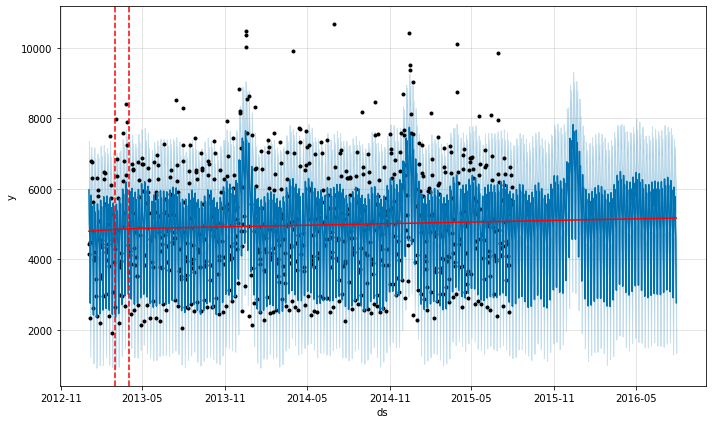

In [76]:
#Let's try to finetune the model by increase the flexibility by adjusting the change point prior scale
m_open_cp=Prophet(changepoint_prior_scale=0.5)
forecast_open_cp=m_open_cp.fit(df2_open).predict(future_open)
fig=m_open_cp.plot(forecast_open_cp)
a=add_changepoints_to_plot(fig.gca(),m_open_cp,forecast_open_cp)

In [77]:
df_cv_open_cp = cross_validation(
    m_open_cp,
    initial='730 days',#prophet defualt
    period='25 days',
    horizon='50 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-12 00:00:00 and 2015-06-11 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [80]:
import statistics as stats
print("model1:",stats.mean(performance_metrics(df_cv)['smape']))
print("model2:",stats.mean(performance_metrics(df_cv_cp)['smape']))
print("model3:",stats.mean(performance_metrics(df_cv_open)['smape']))
print("model4:",stats.mean(performance_metrics(df_cv_open_cp)['smape']))

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Skipping MAPE because y close to 0


model1: 0.4983554372875019
model2: 0.49945839710844725
model3: 0.17769954954872233
model4: 0.1783833177617967


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


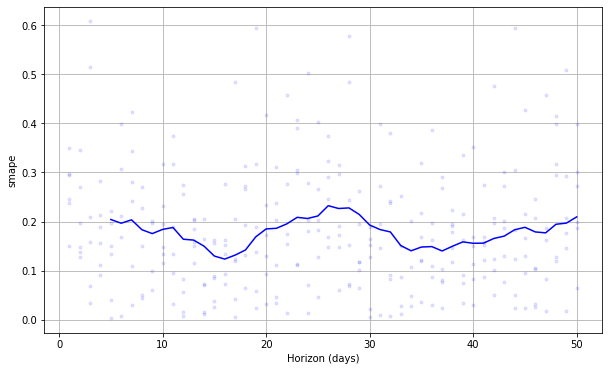

In [79]:
plot_cross_validation_metric(df_cv_open, metric='smape');